# Preparing Time Series from Wide-Form Data

- Robert Yonce
- 6/6/23

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# Import data in

df = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


# Part 1

## Filter the 4 largest cities

In [3]:
# Change data to stop 4 cities

df = df.head(4)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Drop Columns

In [4]:
# Dropping Columns I don't need

df.drop(columns = ['StateName', 'RegionType', 'SizeRank', 'Metro', 'CountyName'], inplace = True)
df

,RegionID,RegionName,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,New York,NY,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,Los Angeles,CA,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,Houston,TX,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,Chicago,IL,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt to Long Form

In [5]:
# Wanted the RegionName to be City

df['City'] = df['RegionName']
df

,RegionID,RegionName,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,City
0,6181,New York,NY,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,...,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0,New York
1,12447,Los Angeles,CA,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,...,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0,Los Angeles
2,39051,Houston,TX,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,...,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0,Houston
3,17426,Chicago,IL,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,...,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0,Chicago


In [6]:
# Melt to long form

melted = pd.melt(df,id_vars=['City','RegionName', 'State', 'RegionID'] )
melted

,City,RegionName,State,RegionID,variable,value
0,New York,New York,NY,6181,2000-01-31,253690.0
1,Los Angeles,Los Angeles,CA,12447,2000-01-31,234181.0
2,Houston,Houston,TX,39051,2000-01-31,109068.0
3,Chicago,Chicago,IL,17426,2000-01-31,166139.0
4,New York,New York,NY,6181,2000-02-29,255517.0
...,...,...,...,...,...,...
1087,Chicago,Chicago,IL,17426,2022-08-31,315587.0
1088,New York,New York,NY,6181,2022-09-30,781622.0
1089,Los Angeles,Los Angeles,CA,12447,2022-09-30,966595.0
1090,Houston,Houston,TX,39051,2022-09-30,272639.0


In [7]:
# Melt the final columns and change the names of Variable and Value

melted = pd.melt(df.drop(columns= ['RegionID', 'RegionName']),
                 id_vars=['City', 'State'],
                value_name='Home_value',var_name="Date")
melted

,City,State,Date,Home_value
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


## Prepare Data for Analysis

In [8]:
# Change date to Datetime dtype

melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        1092 non-null   object        
 1   State       1092 non-null   object        
 2   Date        1092 non-null   datetime64[ns]
 3   Home_value  1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [9]:
# Move Date to index

melted = melted.set_index("Date")
melted

,City,State,Home_value
Date,,,
2000-01-31,New York,NY,253690.0
2000-01-31,Los Angeles,CA,234181.0
2000-01-31,Houston,TX,109068.0
2000-01-31,Chicago,IL,166139.0
2000-02-29,New York,NY,255517.0
...,...,...,...
2022-08-31,Chicago,IL,315587.0
2022-09-30,New York,NY,781622.0
2022-09-30,Los Angeles,CA,966595.0


In [15]:
# Group by city

df_ts = melted.groupby('City').resample("M").sum()
df_ts

/var/folders/vk/t9rtndzd5373ql2yjk1qympr0000gn/T/ipykernel_19631/3007582112.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('City').resample("M").sum()
/var/folders/vk/t9rtndzd5373ql2yjk1qympr0000gn/T/ipykernel_19631/3007582112.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('City').resample("M").sum()
/var/folders/vk/t9rtndzd5373ql2yjk1qympr0000gn/T/ipykernel_19631/3007582112.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or 

Home_value
City     Date                  
Chicago  2000-01-31    166139.0
         2000-02-29    166536.0
         2000-03-31    167368.0
         2000-04-30    168826.0
         2000-05-31    170499.0
...                         ...
New York 2022-05-31    768797.0
         2022-06-30    773944.0
         2022-07-31    777692.0
         2022-08-31    779960.0
         2022-09-30    781622.0

[1092 rows x 1 columns]

# Part 2

## Graph

In [16]:
# Since we want the outermost index (level 0) to become the columns, we will need to specify level=0

unstacked = df_ts.unstack(level=0)
unstacked

Home_value                                
City          Chicago   Houston Los Angeles  New York
Date                                                 
2000-01-31   166139.0  109068.0    234181.0  253690.0
2000-02-29   166536.0  109079.0    234401.0  255517.0
2000-03-31   167368.0  108878.0    235513.0  257207.0
2000-04-30   168826.0  108881.0    237589.0  260310.0
2000-05-31   170499.0  108834.0    240113.0  263204.0
...               ...       ...         ...       ...
2022-05-31   312487.0  265558.0    990391.0  768797.0
2022-06-30   314663.0  268901.0    992337.0  773944.0
2022-07-31   315910.0  271059.0    992630.0  777692.0
2022-08-31   315587.0  272400.0    978196.0  779960.0
2022-09-30   315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [17]:
# Function for graph

def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

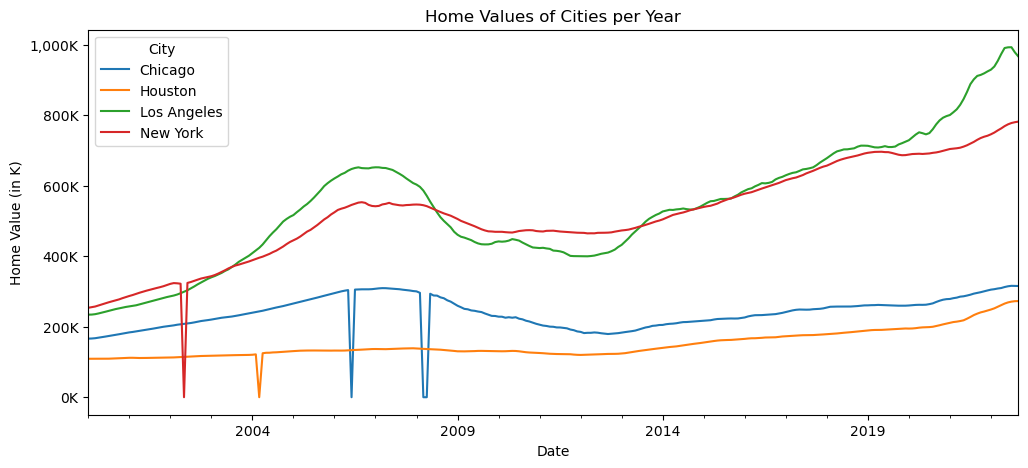

In [24]:
# Graph for all 4 cities

ax = unstacked['Home_value'].plot(figsize=(12,5))

ax.set(title = 'Home Values of Cities per Year', ylabel = 'Home Value (in K)')
fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous);

## Questions

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [19]:
hv08 = unstacked.loc['2008-12-31']
hv08

            City       
Home_value  Chicago        265306.0
            Houston        131283.0
            Los Angeles    469294.0
            New York       510309.0
Name: 2008-12-31 00:00:00, dtype: float64

- At the end of 2008, New York had the highest Home Value at 510,309 with Houston having the lowest at 131,283. 

2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [21]:
diff = unstacked.diff()
diff

Home_value                             
City          Chicago Houston Los Angeles New York
Date                                              
2000-01-31        NaN     NaN         NaN      NaN
2000-02-29      397.0    11.0       220.0   1827.0
2000-03-31      832.0  -201.0      1112.0   1690.0
2000-04-30     1458.0     3.0      2076.0   3103.0
2000-05-31     1673.0   -47.0      2524.0   2894.0
...               ...     ...         ...      ...
2022-05-31     2838.0  4457.0     17223.0   6476.0
2022-06-30     2176.0  3343.0      1946.0   5147.0
2022-07-31     1247.0  2158.0       293.0   3748.0
2022-08-31     -323.0  1341.0    -14434.0   2268.0
2022-09-30     -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [22]:
diff.loc['2008-12-31']

            City       
Home_value  Chicago        -5753.0
            Houston         -964.0
            Los Angeles   -12611.0
            New York       -4458.0
Name: 2008-12-31 00:00:00, dtype: float64

- Above you can see the difference from November to December in Home Values. Each City went down. 